In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Resume.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   2170 non-null   int64 
 1   ID           2170 non-null   int64 
 2   Resume_str   2170 non-null   object
 3   Resume_html  2170 non-null   object
 4   Category     2170 non-null   object
dtypes: int64(2), object(3)
memory usage: 84.9+ KB


In [ ]:
df.Category.value_counts()

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
CONSULTANT                115
HEALTHCARE                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
Name: Category, dtype: int64

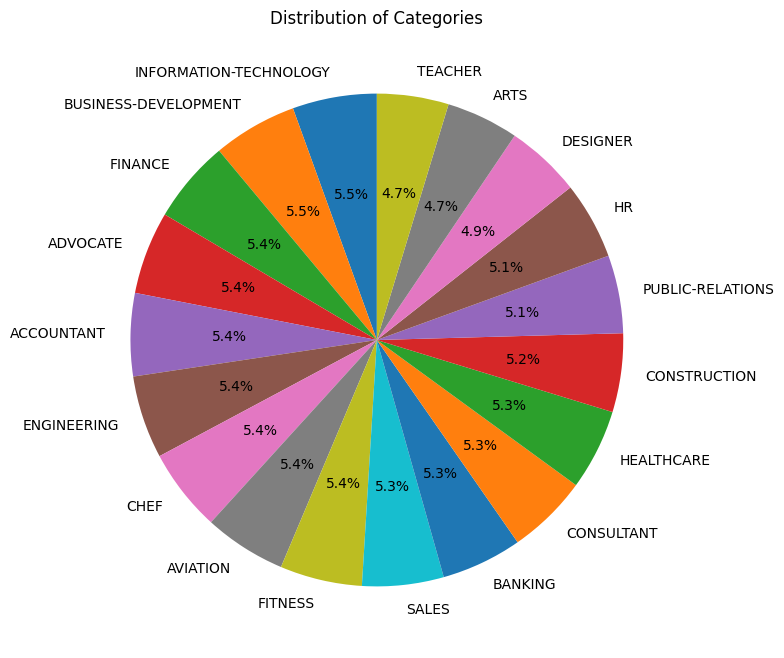

In [ ]:
category_counts = df['Category'].value_counts()

plt.figure(figsize=(8, 8))
category_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Categories')
plt.ylabel('')  # Remove the default 'Category' label on the y-axis
plt.show()


In [ ]:
df = df[['Resume_str', 'Category']]
df.describe()

,Resume_str,Category
count,2170,2170
unique,2168,19
top,FINANCE OFFICER Professional ...,INFORMATION-TECHNOLOGY
freq,2,120


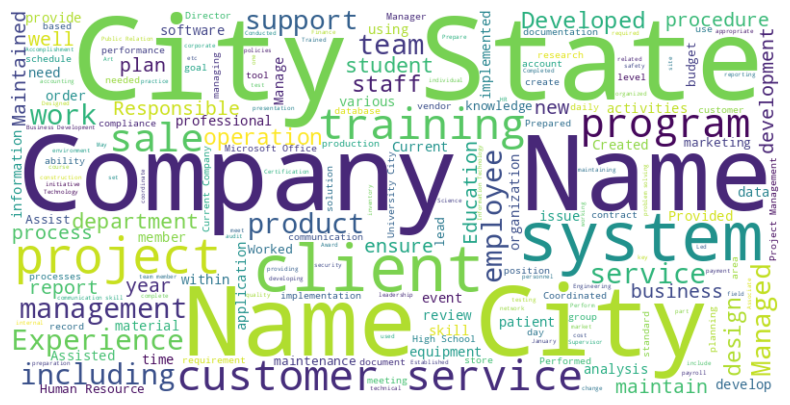

In [ ]:
from wordcloud import WordCloud

# Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Resume_str']))

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder


def keep_alpha_characters(text):

    text = text.encode('utf-8').decode('utf-8')
    alpha_pattern = re.compile('[a-zA-Z]+')

    lines = text.split('\n')
    for i, line in enumerate(lines):
        alpha_only = ' '.join(alpha_pattern.findall(line))
        lines[i] = alpha_only


    result_string = ' '.join(lines)

    resume_text = result_string.lower()
    tokens = word_tokenize(resume_text)
    stop_words = set(stopwords.words('english'))
    stop_words.update(['name', 'city', 'company', 'state'])
    filtered_tokens = [word for word in tokens if word not in stop_words]

    processed_text = ' '.join(filtered_tokens)

    return processed_text

#Label Encoding categories
label_encoder = LabelEncoder()
df['CategoryEncoded'] = label_encoder.fit_transform(df['Category'])

df['Resume_str'] = df['Resume_str'].apply(keep_alpha_characters)
df

,Resume_str,Category,CategoryEncoded
0,hr administrator marketing associate hr admini...,HR,14
1,hr specialist us hr operations summary versati...,HR,14
2,hr director summary years experience recruitin...,HR,14
3,hr specialist summary dedicated driven dynamic...,HR,14
4,hr manager skill highlights hr skills hr depar...,HR,14
...,...,...,...
2165,rank sgt e non commissioned officer charge bri...,AVIATION,3
2166,government relations communications organizati...,AVIATION,3
2167,geek squad agent professional profile support ...,AVIATION,3
2168,program director office manager summary highly...,AVIATION,3


In [ ]:
categories = np.sort(df['Category'].unique())
df_categories = [df[df['Category'] == category].loc[:, ['Resume_str', 'Category']] for category in categories]
df_categories[10]

,Resume_str,Category
1376,engineering technician highlights pc operating...,ENGINEERING
1377,engineering assistant summary knowledgeable en...,ENGINEERING
1378,engineering manager profile dedicated engineer...,ENGINEERING
1379,engineering intern professional summary comput...,ENGINEERING
1380,engineering technician summary obtain position...,ENGINEERING
...,...,...
1489,industrial engineering intern profile outstand...,ENGINEERING
1490,manager quality engineering executive summary ...,ENGINEERING
1491,mechanical design engineering intern summary s...,ENGINEERING
1492,process engineering intern profile phd cleanro...,ENGINEERING


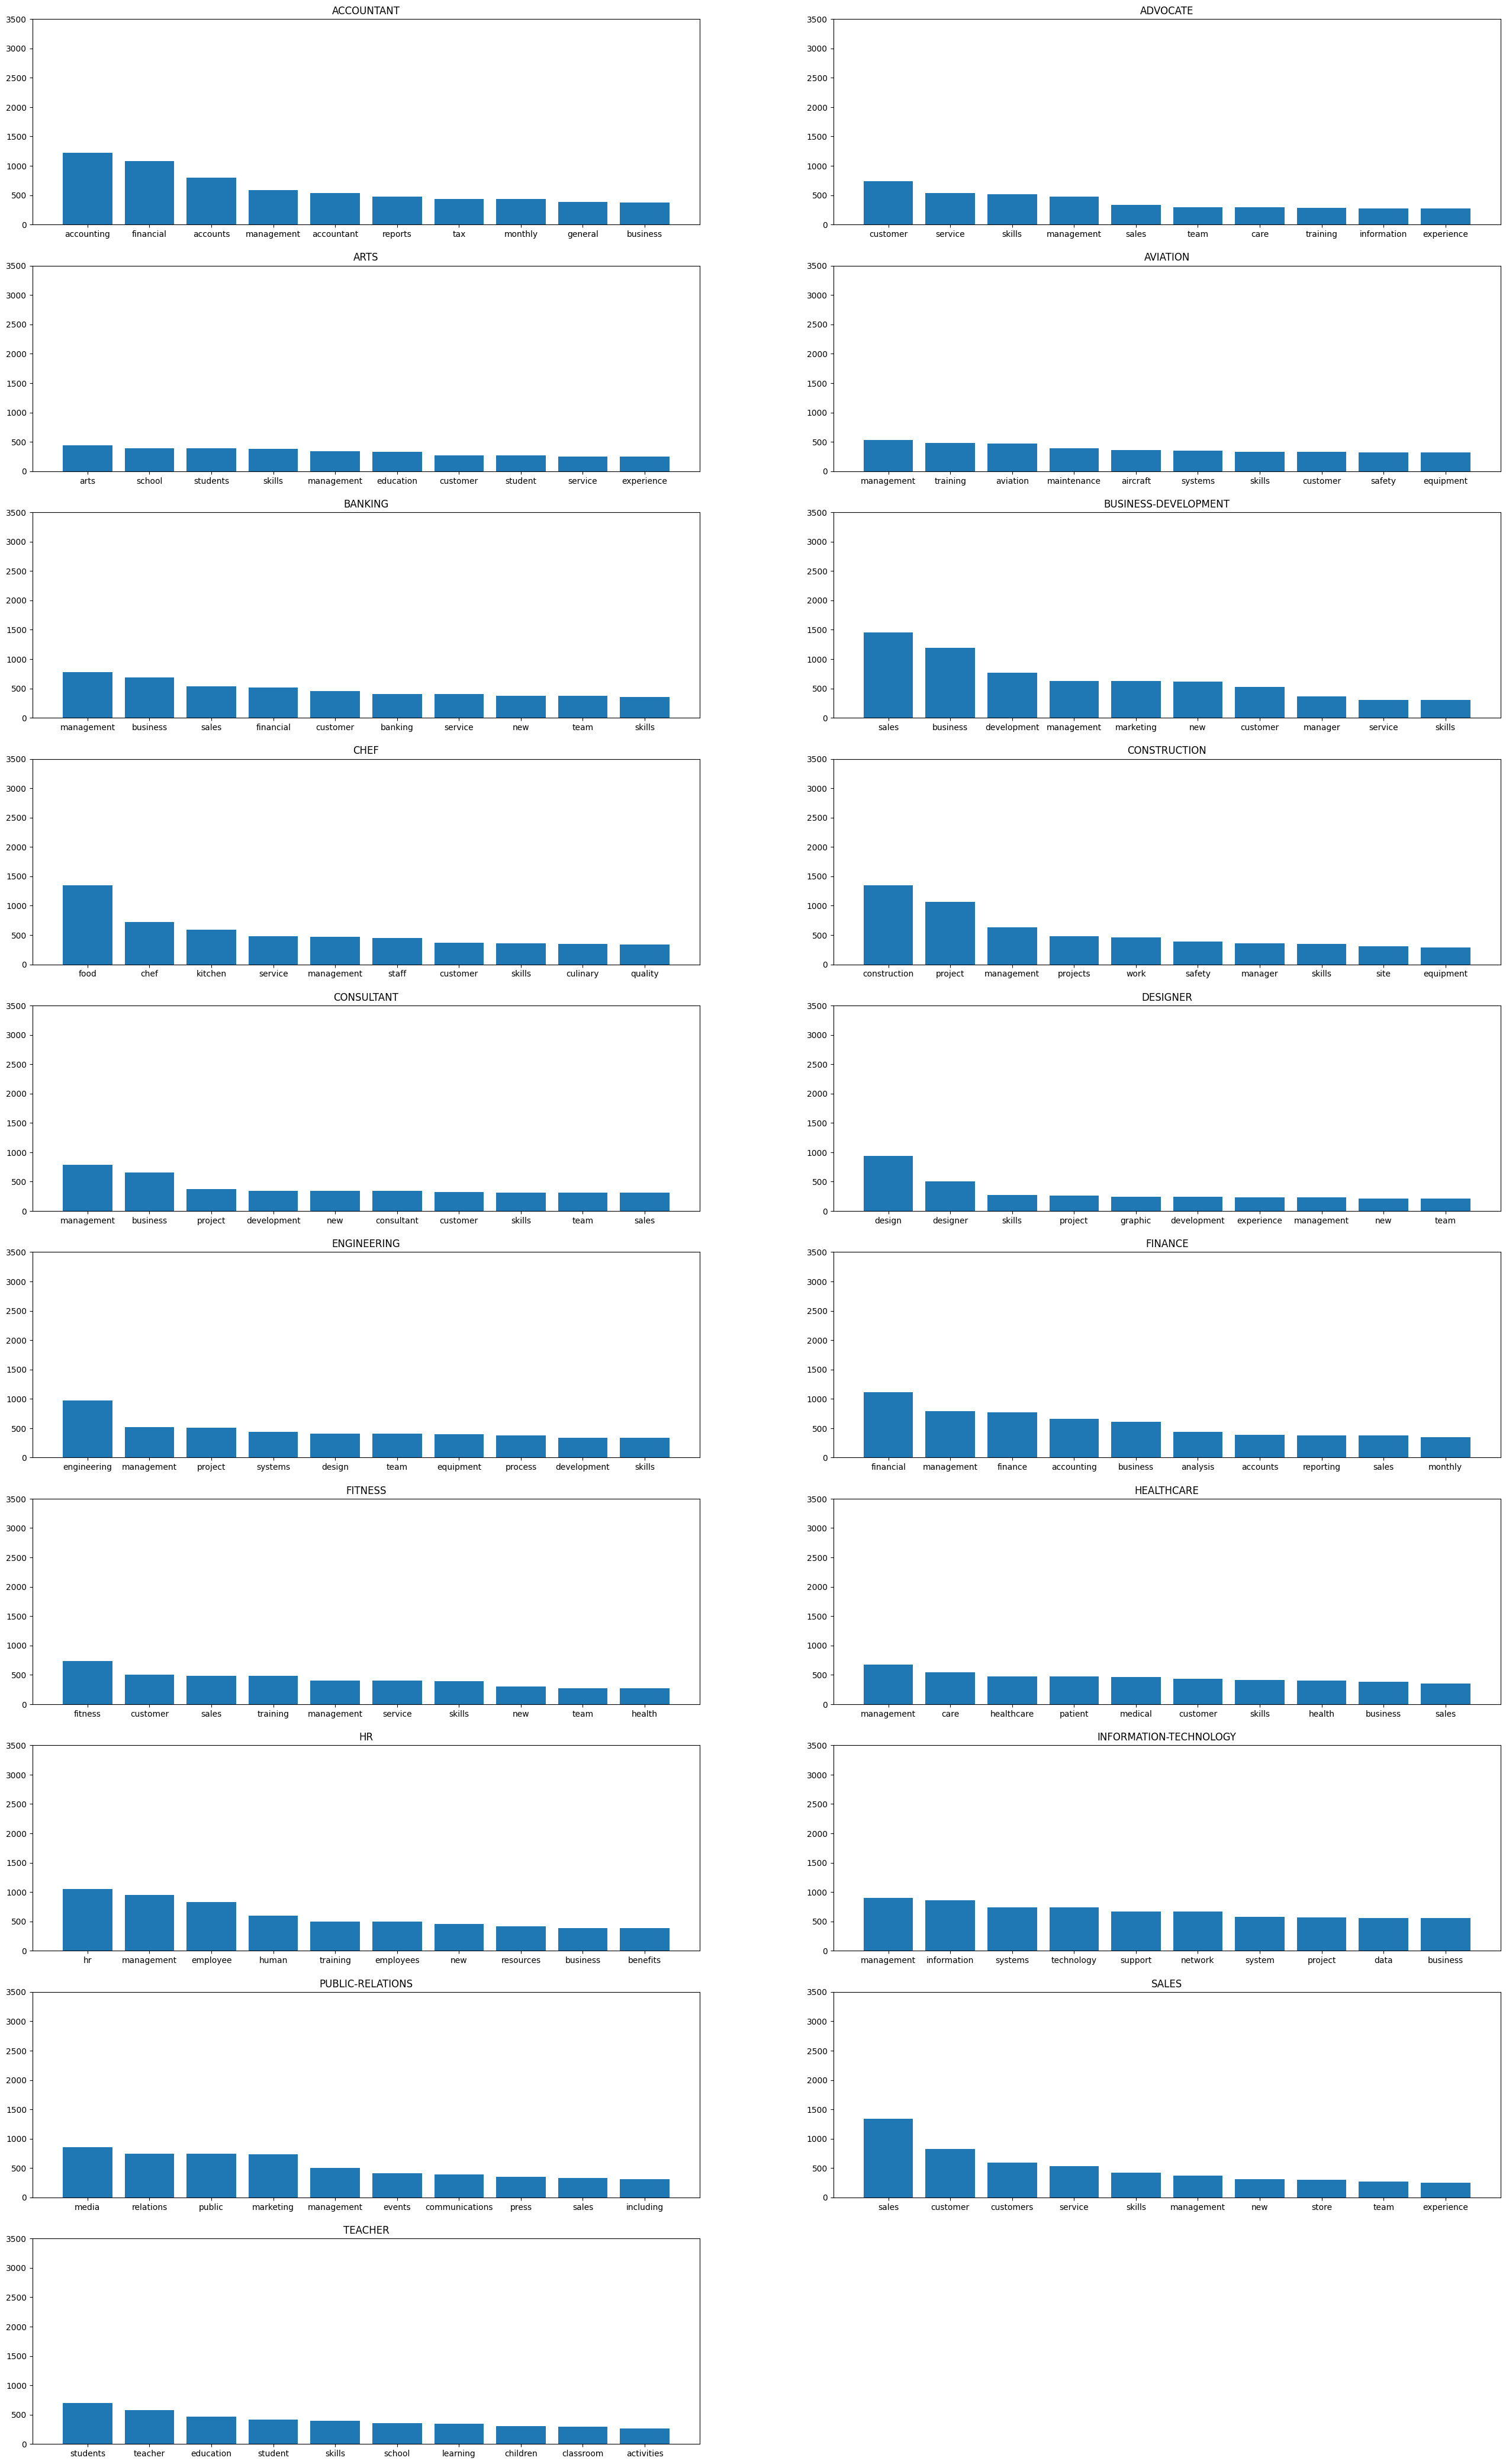

In [ ]:
def wordfreq(df):
    count = df['Resume_str'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(np.sort(df['Category'].unique())):
    wf = wordfreq(df_categories[i])

    fig.add_subplot(12, 2, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 3500)

plt.show()
plt.close()

In [ ]:
def skills_parse(text):
    if 'skills' in text:
        skills = text.split('skills')[1].split()[:20]
        return skills
    else:
        return ''

df['Skills'] = df['Resume_str'].apply(skills_parse)
df

,Resume_str,Category,CategoryEncoded,Skills
0,hr administrator marketing associate hr admini...,HR,14,"[well, computer]"
1,hr specialist us hr operations summary versati...,HR,14,"[adobe, photoshop, adp, asset, management, bra..."
2,hr director summary years experience recruitin...,HR,14,"[recruiting, fmla, eeo, flsa, hris, developmen..."
3,hr specialist summary dedicated driven dynamic...,HR,14,"[type, wpm, key, touch, microsoft, programs, w..."
4,hr manager skill highlights hr skills hr depar...,HR,14,"[hr, department, startup, three, new, organiza..."
...,...,...,...,...
2165,rank sgt e non commissioned officer charge bri...,AVIATION,3,"[managed, accounted, million, military, muniti..."
2166,government relations communications organizati...,AVIATION,3,"[work, history, current, government, relations..."
2167,geek squad agent professional profile support ...,AVIATION,3,"[active, directory, hardware, customer, servic..."
2168,program director office manager summary highly...,AVIATION,3,"[adobe, cpr, clients, customer, satisfaction, ..."


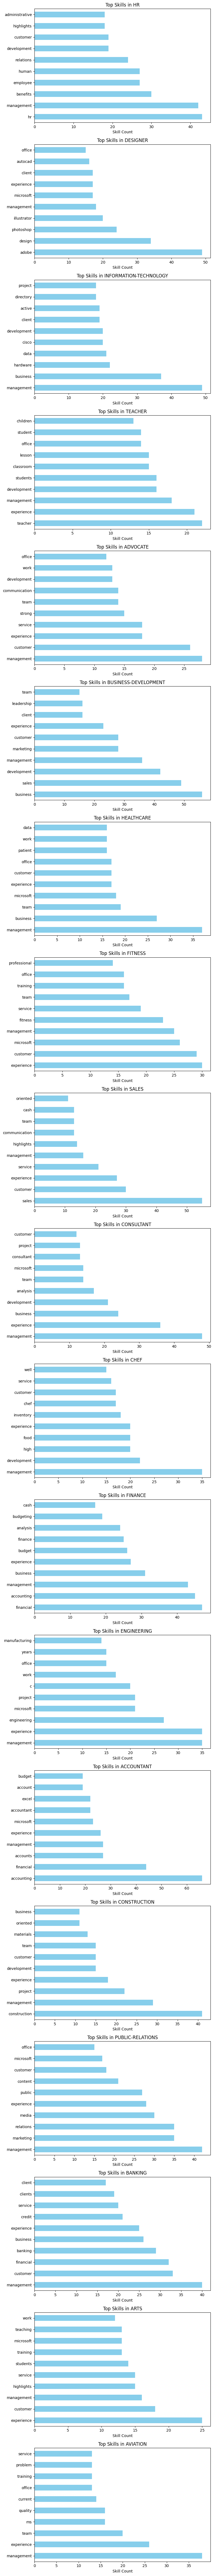

In [ ]:
skill_counts = df.explode('Skills')['Skills'].value_counts()

# Plot top skills for each category
categories = df['Category'].unique()
fig, axes = plt.subplots(nrows=len(categories), ncols=1, figsize=(8, 5 * len(categories)))

for i, category in enumerate(categories):
    category_skills = df[df['Category'] == category].explode('Skills')['Skills']
    category_skill_counts = category_skills.value_counts().head(10)  # Adjust the number of top skills as needed
    category_skill_counts.plot(kind='barh', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Top Skills in {category}')
    axes[i].set_xlabel('Skill Count')

plt.tight_layout()
plt.show()


Accuracy: 0.7903225806451613

Classification Report:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.84      0.94      0.89        17
              ADVOCATE       0.83      0.74      0.78        27
                  ARTS       0.62      0.68      0.65        19
              AVIATION       0.84      0.88      0.86        24
               BANKING       0.71      0.59      0.65        34
  BUSINESS-DEVELOPMENT       0.68      0.74      0.71        23
                  CHEF       0.94      0.80      0.86        20
          CONSTRUCTION       0.77      0.96      0.85        24
            CONSULTANT       0.75      0.57      0.65        21
              DESIGNER       0.90      0.95      0.93        20
           ENGINEERING       0.81      0.88      0.85        25
               FINANCE       0.73      0.79      0.76        24
               FITNESS       0.77      0.81      0.79        21
            HEALTHCARE       0.78      0.74      

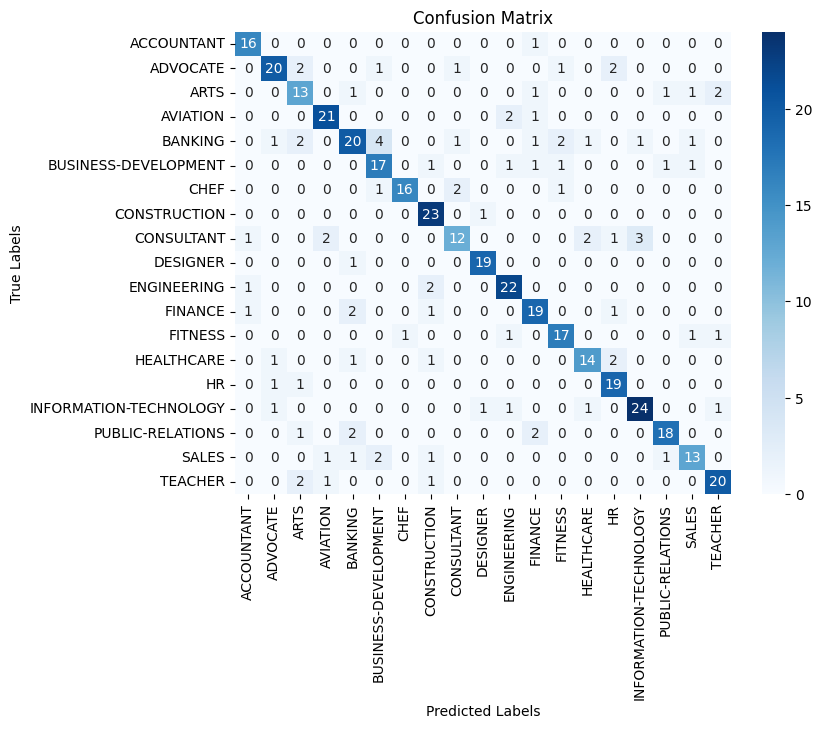

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Resume_str'], df['CategoryEncoded'], test_size=0.2, random_state=42
)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

xgb_classifier = XGBClassifier(n_estimators = 200, learning_rate = 0.1, max_depth = 4)
xgb_classifier.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred = xgb_classifier.predict(X_test_tfidf)

y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_decoded, y_pred_decoded))
print("\nClassification Report:\n", classification_report(y_test_decoded, y_pred_decoded))

conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(
    df['Resume_str'], df['CategoryEncoded'], test_size=0.2, random_state=42
)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Create an XGBoost classifier
xgb_classifier = XGBClassifier(n_estimators = 200, learning_rate = 0.1, max_depth = 4)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [200, 150],
    'learning_rate': [0.1, 0.2],
    'max_depth': [4, 5]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_tfidf, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Train the XGBoost classifier with the best parameters
best_xgb_classifier = XGBClassifier(**grid_search.best_params_)
best_xgb_classifier.fit(X_train_tfidf, y_train)

# Test the model
y_pred = best_xgb_classifier.predict(X_test_tfidf)

y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost Classifier')
plt.show()

# Classification Report
print('\nClassification Report:\n')
print(classification_report(y_test_decoded, y_pred_decoded))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Best Accuracy: 0.7989781046076386


ValueError: ignored